In [19]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

from utils import image_process

In [20]:
beds_path = image_process.image_path('beds')
chairs_path = image_process.image_path('chairs')
sofas_path = image_process.image_path('sofas')
tables_path = image_process.image_path('tables')
dressers_path = image_process.image_path('dressers')
lamps_path = image_process.image_path('lamps')

print(len(beds_path))
print(len(chairs_path))
print(len(sofas_path))
print(len(tables_path))
print(len(dressers_path))
print(len(lamps_path))

6578
22053
4080
17100
7871
32402


In [21]:
label_names = {
    'beds': 0,
    'chairs': 1,
    'dressers': 2,
    'lamps': 3,
    'sofas': 4,
    'tables': 5
}

In [22]:
# general_path = beds_path + chairs_path + sofas_path + tables_path + dressers_path + lamps_path
# print(len(general_path))
# gen_df = pd.DataFrame(general_path, columns=['path'])
# gen_df['label'] = ''


In [23]:
beds_df = pd.DataFrame(beds_path, columns=['path'])
beds_df['label'] = 0

chairs_df = pd.DataFrame(chairs_path, columns=['path'])
chairs_df['label'] = 1

sofas_df = pd.DataFrame(sofas_path, columns=['path'])
sofas_df['label'] = 4

tables_df = pd.DataFrame(tables_path, columns=['path'])
tables_df['label'] = 5

dressers_df = pd.DataFrame(dressers_path, columns=['path'])
dressers_df['label'] = 2

lamps_df = pd.DataFrame(lamps_path, columns=['path'])
lamps_df['label'] = 3

general_path = pd.concat([beds_df, chairs_df, sofas_df, tables_df, dressers_df, lamps_df], ignore_index=True)

        

In [24]:
general_path

,path,label
0,./Furniture_Data/beds/Asian/19726asian-daybeds...,0
1,./Furniture_Data/beds/Asian/20027asian-canopy-...,0
2,./Furniture_Data/beds/Asian/20109asian-panel-b...,0
3,./Furniture_Data/beds/Asian/20508asian-platfor...,0
4,./Furniture_Data/beds/Asian/20750asian-comfort...,0
...,...,...
90079,./Furniture_Data/lamps/Victorian/8704victorian...,3
90080,./Furniture_Data/lamps/Victorian/8722victorian...,3
90081,./Furniture_Data/lamps/Victorian/8857victorian...,3
90082,./Furniture_Data/lamps/Victorian/9061victorian...,3


In [25]:
train_data, test_data = train_test_split(general_path, test_size=0.2, shuffle=True)
train_data, val_data = train_test_split(train_data, test_size=0.25, shuffle=True)

In [26]:
print(len(train_data))
print(len(test_data))
print(len(val_data))

train_data.head()

54050
18017
18017


,path,label
63570,./Furniture_Data/lamps/Contemporary/2152contem...,3
68858,./Furniture_Data/lamps/Craftsman/27400craftsma...,3
66674,./Furniture_Data/lamps/Contemporary/625contemp...,3
59637,./Furniture_Data/lamps/Beach/15366beach-style-...,3
47260,./Furniture_Data/tables/Traditional/15024tradi...,5


In [27]:
INPUT_DIM = (32,32,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 6

In [28]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.__version__

'2.10.1'

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               786688    
                                                                 
 dense_3 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 788,230
Trainable params: 788,230
Non-trainable params: 0
_________________________________________________________________


In [31]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [32]:
model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['categorical_accuracy'])

In [33]:
# train_data_df = pd.DataFrame(train_data, columns=['path'])
# test_data_df = pd.DataFrame(test_data, columns=['path'])
# val_data_df = pd.DataFrame(val_data, columns=['path'])


In [34]:
train_data['label'] = train_data['label'].astype('str')
test_data['label'] = test_data['label'].astype('str')
val_data['label'] = val_data['label'].astype('str')

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
test_generator = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory=None,
        x_col="path",
        y_col="label",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = val_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory=None,
        x_col="path",
        y_col="label",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory=None,
        x_col="path",
        y_col="label",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

Found 54049 validated image filenames belonging to 6 classes.


c:\Users\maste\anaconda3\envs\ML_py3.10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


Found 18017 validated image filenames belonging to 6 classes.
Found 18016 validated image filenames belonging to 6 classes.


c:\Users\maste\anaconda3\envs\ML_py3.10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


In [44]:
# history = model.fit_generator(train_generator, validation_data=validation_generator, epochs=50, verbose=0)
history = model.fit_generator(train_generator, validation_data=validation_generator, epochs=5, verbose=0)
# print(train_generator.class_indices)

C:\Users\maste\AppData\Local\Temp\ipykernel_14668\2606586777.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data=validation_generator, epochs=5, verbose=0)


In [37]:
model.evaluate(test_generator)

564/564 [==============================] - 11s 20ms/step - loss: 0.7115 - categorical_accuracy: 0.7517


[0.7115005850791931, 0.7516789436340332]

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


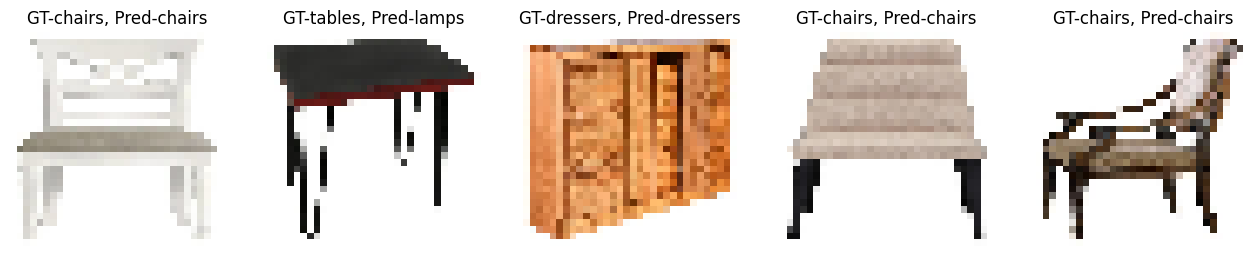

In [51]:
d_inv = {
    v: k for k, v in label_names.items()
}
import matplotlib.pyplot as plt
import numpy as np
# print(test_generator.class_indices)
# print(d_inv)
plt.figure(figsize=(16, 4))
batches = 0
for x, y in test_generator:
    batches = batches + 1
    y_hat = model.predict(x, verbose=0)
    x = np.squeeze(x)
    if batches < 6:
        plt.subplot(1, 5, batches)
        plt.imshow(x)
        plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])]))
        print(x.shape)
    else:
        break
    plt.axis('off')


In [55]:
import os
model.save(os.path.join('model', 'raw_model.h5'))